In [1]:
import os
#Change working directory
os.chdir('/Users/aleksandrabahareva/Downloads')

In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('Bitcoin Energy Consumption.csv',
                       index_col ='Date',
                       parse_dates = True)

In [6]:
df.head()

,Estimated TWh per Year,Minimum TWh per Year
Date,,
2017-02-10,9.585659,3.331026
2017-02-11,9.547335,3.316227
2017-02-12,9.578774,3.198969
2017-02-13,9.476506,3.045178
2017-02-14,9.544807,3.150062


<AxesSubplot:xlabel='Date'>

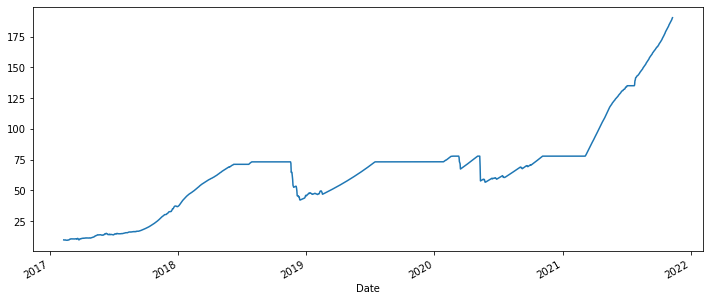

In [7]:
df['Estimated TWh per Year'].plot(figsize=(12,5))

In [8]:
stepwise_fit = auto_arima(df['Estimated TWh per Year'], trace = True,
                          suppress_warnings = True)        
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2090.456, Time=0.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2686.325, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2595.216, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2370.312, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2112.704, Time=0.39 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2127.860, Time=0.39 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2092.079, Time=1.67 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=2091.431, Time=2.95 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2139.830, Time=0.60 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2101.872, Time=1.61 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2106.658, Time=0.74 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=2093.693, Time=1.66 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2092.111, Time=2.08 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 13.107 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1736
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1040.228
Date:                Sat, 27 Nov 2021   AIC                           2090.456
Time:                        13:22:09   BIC                           2117.747
Sample:                             0   HQIC                          2100.549
                               - 1736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3575      0.023    -15.690      0.000      -0.402      -0.313
ar.L2          0.2377      0.015     16.064      0.000       0.209       0.267
ma.L1         -0.1329      0.022     -6.071      0.000      -0.176      -0.090
ma.L2         -0.8139      0.023    -35.111      0.000      -0.859      -0.768
sigma2         0.1941      0.001    232.103      0.000       0.192       0.196
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           2399210.43
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              24.34   Skew:                            -8.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       184.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1736, 2)
(1706, 2) (30, 2)


In [11]:
model=ARIMA(train['Estimated TWh per Year'],order=(2,2,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D2.Estimated TWh per Year   No. Observations:                 1704
Model:                        ARIMA(2, 2, 2)   Log Likelihood               -1035.364
Method:                              css-mle   S.D. of innovations              0.444
Date:                       Sat, 27 Nov 2021   AIC                           2082.727
Time:                               13:22:58   BIC                           2115.372
Sample:                                    2   HQIC                          2094.811
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0002      0.000      0.483      0.629      -0.001       0.001
ar.L1.D2.Estimated TWh per Year    -0.3556      0.058     -6.102      0.000      -0.470      -0.241
ar.L2.D2.Estimated TWh per Year     0.2384      0.042      5.620      0.000       0.155       0.322
ma.L1.D2.Estimated TWh per Year    -0.1347      0.050     -2.717      0.007      -0.232      -0.038
ma.L2.D2.Estimated TWh per Year    -0.8145      0.050    -16.348      0.000      -0.912      -0.717
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4339           +0.0000j            1.4339            0.5000
AR.2            2.9254           +0.0000j            2.9254            0.0000
MA.1            1.0284           +0.0000j            1.0284            0.0000
MA.2           -1.1939           +0.0000j            1.1939            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

Date
2021-10-12    173.205752
2021-10-13    173.632813
2021-10-14    174.067224
2021-10-15    174.492041
2021-10-16    174.922291
2021-10-17    175.348591
2021-10-18    175.777860
2021-10-19    176.205402
2021-10-20    176.634535
2021-10-21    177.062959
2021-10-22    177.492285
2021-10-23    177.921390
2021-10-24    178.351058
2021-10-25    178.780743
2021-10-26    179.210825
2021-10-27    179.641040
2021-10-28    180.071571
2021-10-29    180.502291
2021-10-30    180.933289
2021-10-31    181.364502
2021-11-01    181.795974
2021-11-02    182.227675
2021-11-03    182.659626
2021-11-04    183.091812
2021-11-05    183.524243
2021-11-06    183.956913
2021-11-07    184.389826
2021-11-08    184.822978
2021-11-09    185.256372
2021-11-10    185.690007
dtype: float64


<AxesSubplot:xlabel='Date'>

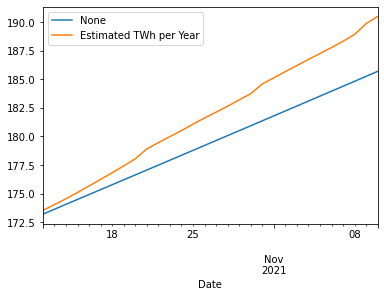

In [13]:
pred.plot(legend=True)
test['Estimated TWh per Year'].plot(legend=True)

In [14]:
test['Estimated TWh per Year'].mean()

181.8561940066667

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Estimated TWh per Year']))
print(rmse)

2.746910428923064


In [16]:
model2=ARIMA(df['Estimated TWh per Year'],order=(2,2,2))
model2=model2.fit()
df.tail()

,Estimated TWh per Year,Minimum TWh per Year
Date,,
2021-11-06,187.773455,48.518606
2021-11-07,188.325383,48.806185
2021-11-08,188.926128,48.935738
2021-11-09,189.876489,49.336480
2021-11-10,190.490489,49.350032


In [17]:
index_future_dates=pd.date_range(start='2021-11-10',end='2021-12-10')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-11-10    191.011044
2021-11-11    191.564837
2021-11-12    192.084800
2021-11-13    192.625110
2021-11-14    193.150415
2021-11-15    193.686267
2021-11-16    194.215104
2021-11-17    194.749297
2021-11-18    195.280237
2021-11-19    195.813949
2021-11-20    196.346227
2021-11-21    196.880012
2021-11-22    197.413251
2021-11-23    197.947376
2021-11-24    198.481388
2021-11-25    199.015985
2021-11-26    199.550678
2021-11-27    200.085810
2021-11-28    200.621141
2021-11-29    201.156839
2021-11-30    201.692786
2021-12-01    202.229065
2021-12-02    202.765618
2021-12-03    203.302485
2021-12-04    203.839638
2021-12-05    204.377097
2021-12-06    204.914848
2021-12-07    205.452901
2021-12-08    205.991248
2021-12-09    206.529896
2021-12-10    207.068839
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

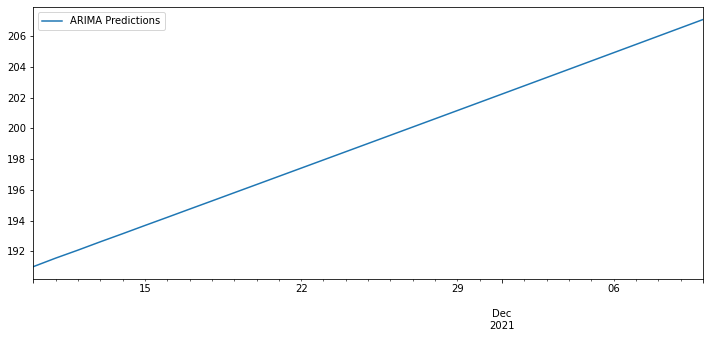

In [18]:
pred.plot(figsize=(12,5),legend=True)